In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from matplotlib import ticker
from sklearn import manifold

In [128]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected stage_train_dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [129]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
missing_values_table(diabetes_data)

Your selected stage_train_dataframe has 9 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [131]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [132]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [133]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [134]:
features = diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
label = diabetes_data[['Outcome']]

<Figure size 640x480 with 0 Axes>

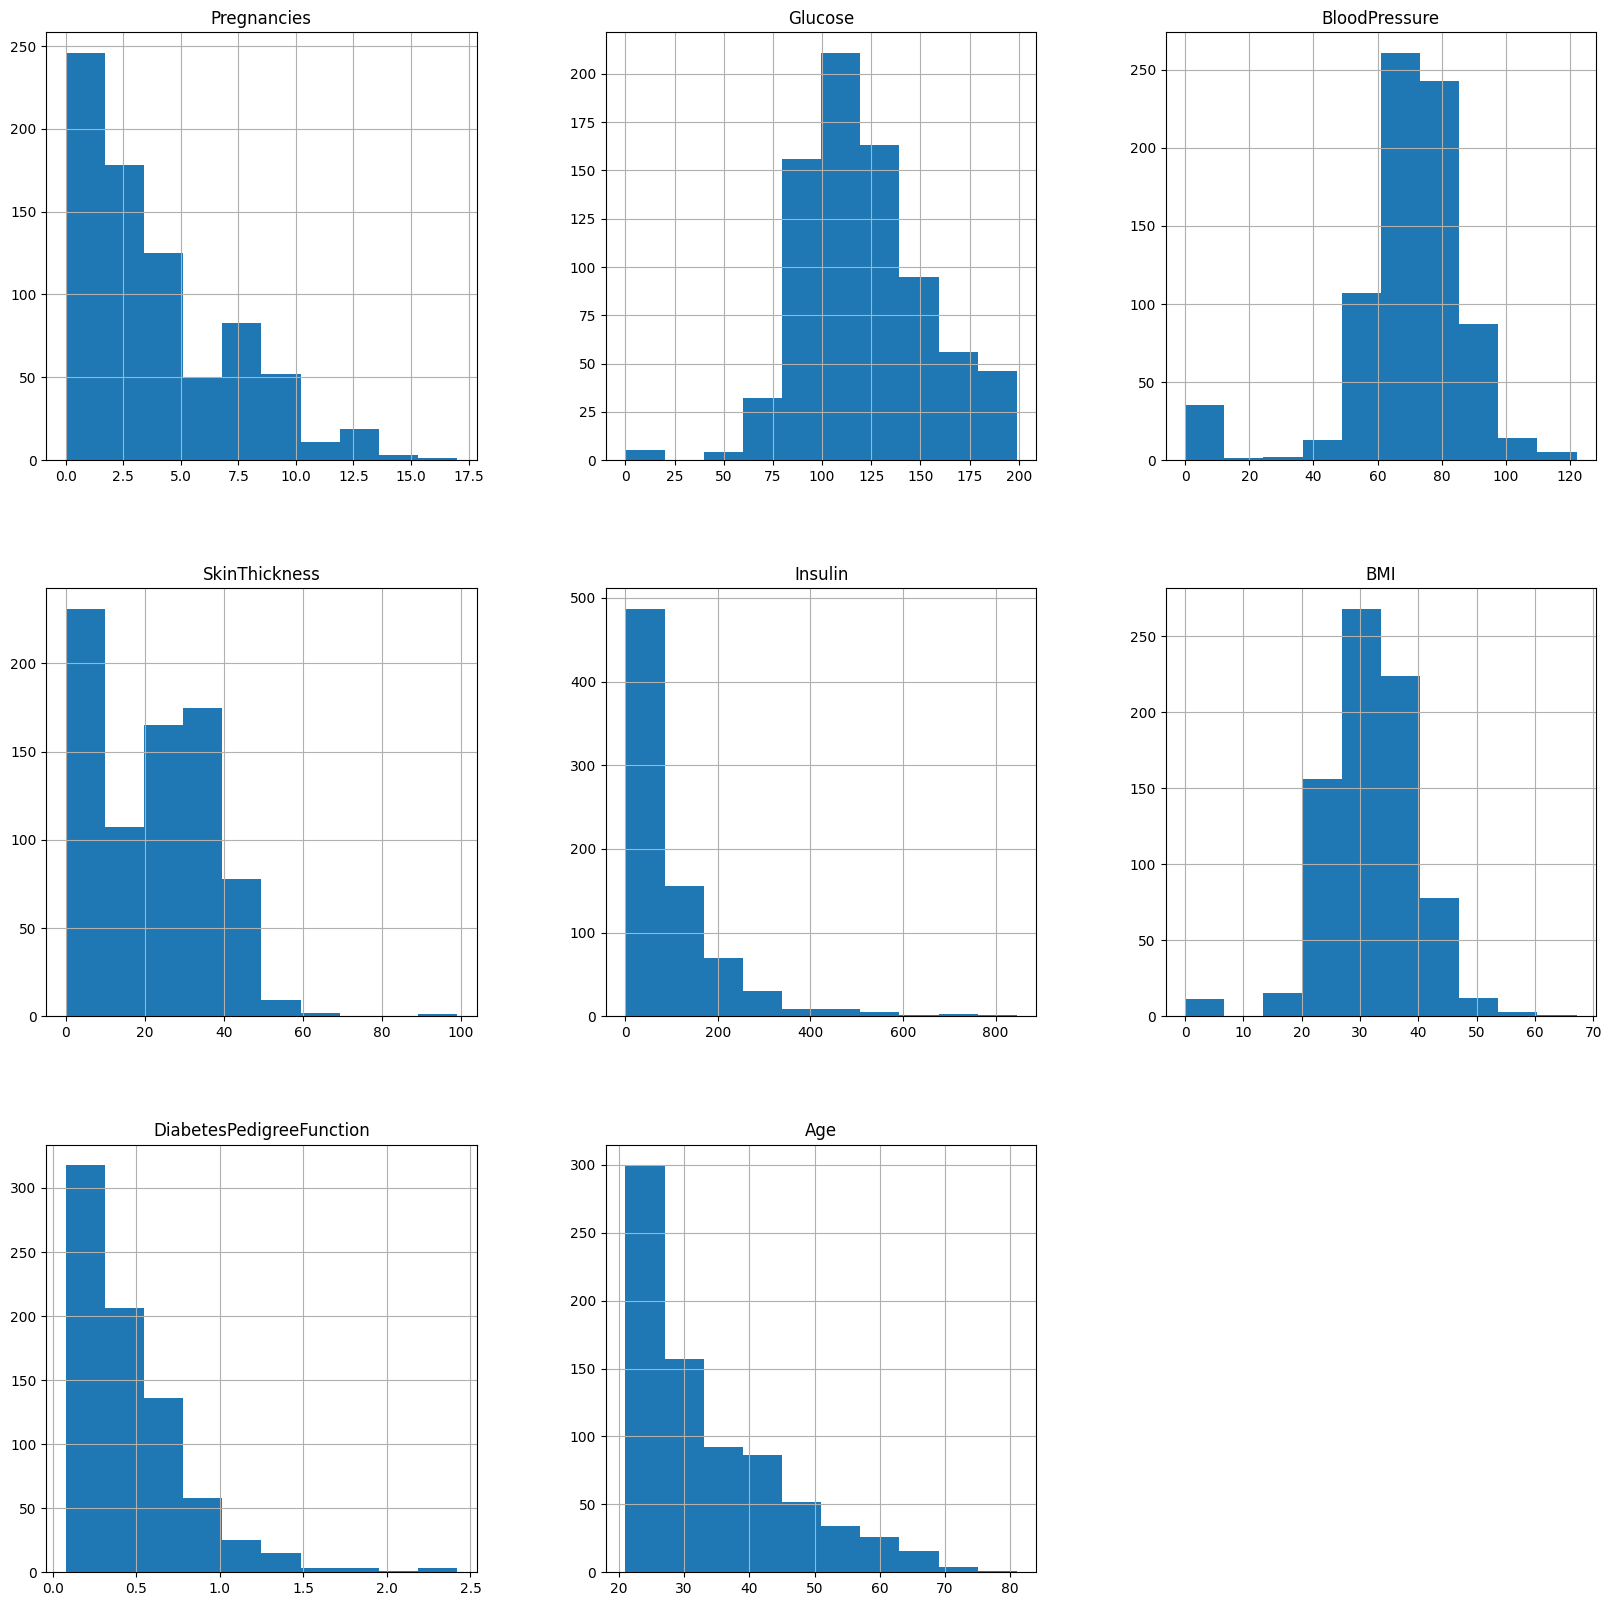

In [135]:
plt.figure()
features.hist(figsize=(20,20))
plt.show()

Maybe nan value is the 0 values in some features. Unlogical if BMI=0

In [136]:
features[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=features[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.NaN)
missing_values_table(features)

Your selected stage_train_dataframe has 8 columns.
There are 5 columns that have missing values.


C:\Users\Qing\AppData\Local\Temp\ipykernel_15276\3626212556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',


,Missing Values,% of Total Values
Insulin,374,48.7
SkinThickness,227,29.6
BloodPressure,35,4.6
BMI,11,1.4
Glucose,5,0.7


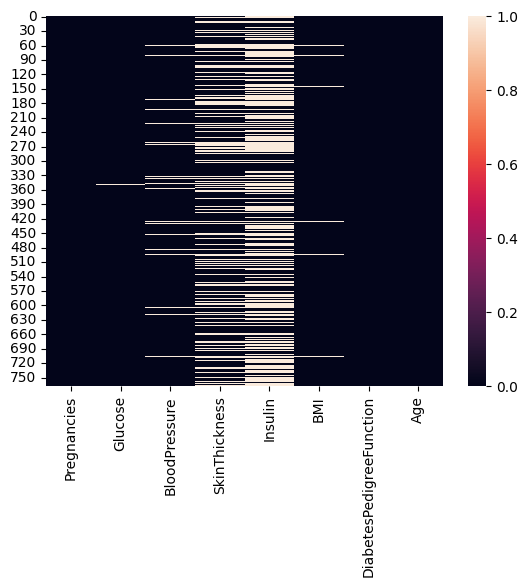

In [137]:
plt.figure()
sns.heatmap(features.isnull())
plt.show()

In [138]:
features['Glucose'].fillna(features['Glucose'].mean(), inplace = True)
features['BloodPressure'].fillna(features['BloodPressure'].mean(), inplace = True)
features['SkinThickness'].fillna(features['SkinThickness'].median(), inplace = True)
features['Insulin'].fillna(features['Insulin'].median(), inplace = True)
features['BMI'].fillna(features['BMI'].median(), inplace = True)

C:\Users\Qing\AppData\Local\Temp\ipykernel_15276\95546433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Glucose'].fillna(features['Glucose'].mean(), inplace = True)
C:\Users\Qing\AppData\Local\Temp\ipykernel_15276\95546433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['BloodPressure'].fillna(features['BloodPressure'].mean(), inplace = True)
C:\Users\Qing\AppData\Local\Temp\ipykernel_15276\95546433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

## Save cleaned datasets

In [139]:
feature_names = features.columns
features = StandardScaler().fit_transform(features)
features = pd.DataFrame(features,columns=feature_names)

In [140]:
df = pd.concat([features, label], axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.150354,0.455573,0.064737,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-0.239949,-0.181541,0.632365,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,-0.012301,-0.181541,-0.342790,-0.371101,1.170732,1


In [141]:
df.to_json('diabetes.json',index=True)

## PCA

In [142]:
df = pd.read_json('diabetes.json')
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
label = df[['Outcome']]

In [143]:
def get_linear_prediction_scores(features,label):
    features = np.array(features)
    label = np.array(label).ravel()
    kf = KFold(n_splits=10)
    train_AUCs=[]
    val_AUCs=[]
    train_BERs=[]
    val_BERs=[]
    for train_index, val_index in kf.split(label):
        X_train, X_val = features[train_index], features[val_index]
        y_train, y_val = label[train_index], label[val_index]
        clf=LogisticRegression()
        clf.fit(X_train, y_train)
        train_AUCs.append(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
        val_AUCs.append(roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1]))
        train_BERs.append(balanced_accuracy_score(y_train, clf.predict(X_train)))
        val_BERs.append(balanced_accuracy_score(y_val, clf.predict(X_val)))
    print("Train AUCs with 10 fold validation")
    print(np.mean(train_AUCs))
    print("Val AUCs with 10 fold validation")
    print(np.mean(val_AUCs))
    print("Train BERs with 10 fold validation")
    print(np.mean(train_BERs))
    print("Val BERs with 10 fold validation")
    print(np.mean(val_BERs)) 
    return np.mean(val_AUCs),np.std(val_AUCs),np.mean(val_BERs),np.std(val_BERs)

In [144]:
get_linear_prediction_scores(features=features,label=label)

Train AUCs with 10 fold validation
0.8367354392989936
Val AUCs with 10 fold validation
0.8329550855316938
Train BERs with 10 fold validation
0.735619887687281
Val BERs with 10 fold validation
0.7345576273088394


(0.8329550855316938,
 0.048355239473569296,
 0.7345576273088394,
 0.043249020398639273)

In [145]:
df = pd.read_json('diabetes.json')
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
label = df[['Outcome']]

In [146]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, label], axis = 1)

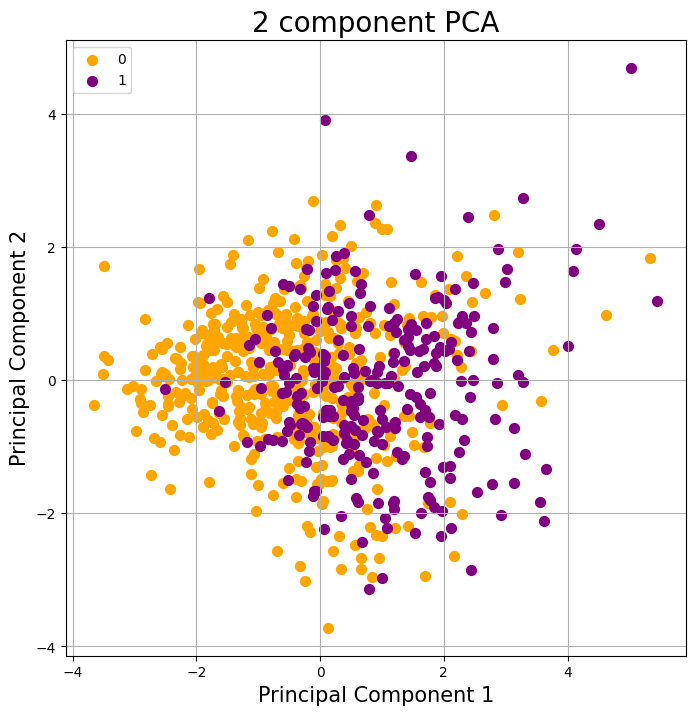

In [147]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['orange','purple']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()

In [148]:
get_linear_prediction_scores(features=principalDf,label=label)

Train AUCs with 10 fold validation
0.797799494832421
Val AUCs with 10 fold validation
0.7963443821075844
Train BERs with 10 fold validation
0.6785106296017085
Val BERs with 10 fold validation
0.6774276982858483


(0.7963443821075844,
 0.05333928995606844,
 0.6774276982858483,
 0.04325918826566479)

Not well separated and information is not well preserved with pca (components = 2)

In [149]:
df = pd.read_json('diabetes.json')
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
label = df[['Outcome']]
pca = PCA(n_components=np.shape(features)[1]-1)
principalComponents = pca.fit_transform(features)
print(pca.explained_variance_ratio_)
cumulative_percent_explained=[]
aucs_mean = []
bers_mean= []
aucs_std = []
bers_std= []
for feature_num in range(2,np.shape(features)[1]-1,1):
    x=principalComponents[:,:feature_num]
    auc_i_mean,auc_i_std,ber_i_mean,ber_i_std = get_linear_prediction_scores(features=x,label=label)
    cumulative_percent_explained.append(sum(pca.explained_variance_ratio_[:feature_num]))
    aucs_mean.append(auc_i_mean)
    bers_mean.append(ber_i_mean)
    aucs_std.append(auc_i_std)
    bers_std.append(ber_i_std)


[0.31043008 0.16814706 0.16261793 0.12848825 0.09517781 0.07673677]
Train AUCs with 10 fold validation
0.797799494832421
Val AUCs with 10 fold validation
0.7963443821075844
Train BERs with 10 fold validation
0.6785106296017085
Val BERs with 10 fold validation
0.6774276982858483
Train AUCs with 10 fold validation
0.8150534743319005
Val AUCs with 10 fold validation
0.8117199055990778
Train BERs with 10 fold validation
0.6866967869244472
Val BERs with 10 fold validation
0.6877149796851206
Train AUCs with 10 fold validation
0.8150597518525832
Val AUCs with 10 fold validation
0.810367150153172
Train BERs with 10 fold validation
0.686943426670793
Val BERs with 10 fold validation
0.6853122966215334
Train AUCs with 10 fold validation
0.8150608919892702
Val AUCs with 10 fold validation
0.8101631776404989
Train BERs with 10 fold validation
0.6822582477049773
Val BERs with 10 fold validation
0.6794962513403717


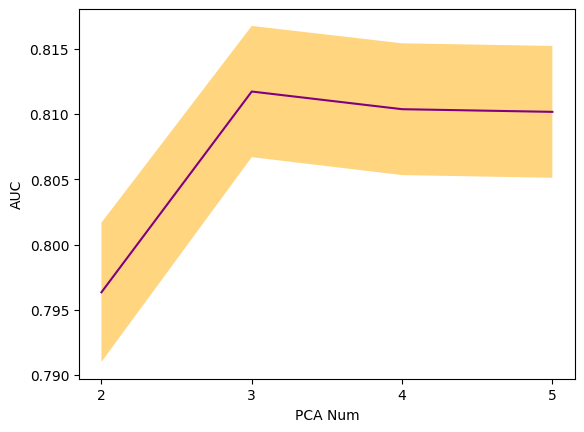

In [150]:
aucs_std=np.array(aucs_std)
bers_std=np.array(bers_std)

plt.figure()
plt.plot(list(range(2,np.shape(features)[1]-1,1)),aucs_mean,color='purple')
plt.fill_between(list(range(2,np.shape(features)[1]-1,1)),aucs_mean-0.1*aucs_std,aucs_mean+0.1*aucs_std,facecolor=(255/255, 213/255, 128/255))
plt.xlabel('PCA Num')
plt.xticks(list(range(2,np.shape(features)[1]-1,1)))
plt.ylabel('AUC')
plt.show()

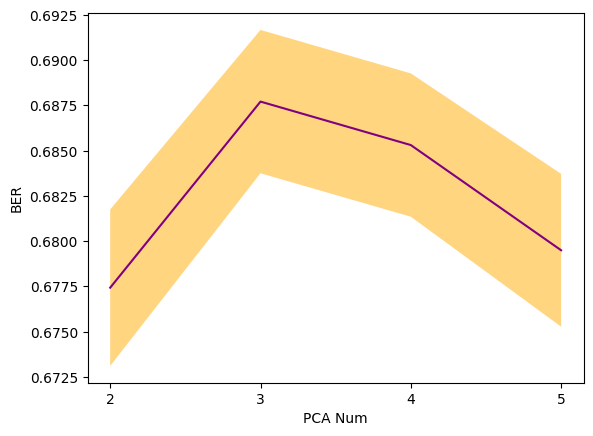

In [151]:
plt.figure()
plt.plot(list(range(2,np.shape(features)[1]-1,1)),bers_mean,color='purple')
plt.fill_between(list(range(2,np.shape(features)[1]-1,1)),bers_mean-0.1*bers_std,bers_mean+0.1*bers_std,facecolor=(255/255, 213/255, 128/255))
plt.xlabel('PCA Num')
plt.xticks(list(range(2,np.shape(features)[1]-1,1)))
plt.ylabel('BER')
plt.show()

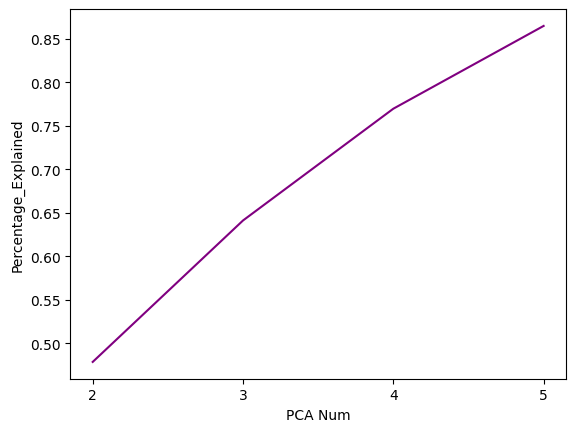

In [152]:
plt.figure()
plt.plot(list(range(2,np.shape(features)[1]-1,1)),cumulative_percent_explained,color='purple')
plt.xlabel('PCA Num')
plt.xticks(list(range(2,np.shape(features)[1]-1,1)))
plt.ylabel('Percentage_Explained')
plt.show()

3 PCA are good to represent the information

The following codes are in reference to https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

## LLE

In [153]:
df = pd.read_json('diabetes.json')
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
label = df[['Outcome']]

In [154]:
df['color']=df['Outcome'].apply(lambda x:tuple(ti/255 for ti in (251, 192, 147)) if x==1 else tuple(ti/255 for ti in (128,0,128)))
color = df[['color']]

In [166]:

def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=10, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=10, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

In [156]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto"
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(features)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(features)

# lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
# S_hessian = lle_hessian.fit_transform(features)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", modified_tol=0.8, **params)
S_mod = lle_mod.fit_transform(features)

e:\Anaconda3\envs\sklearn-env\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:935: LinAlgWarning: Diagonal number 107 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


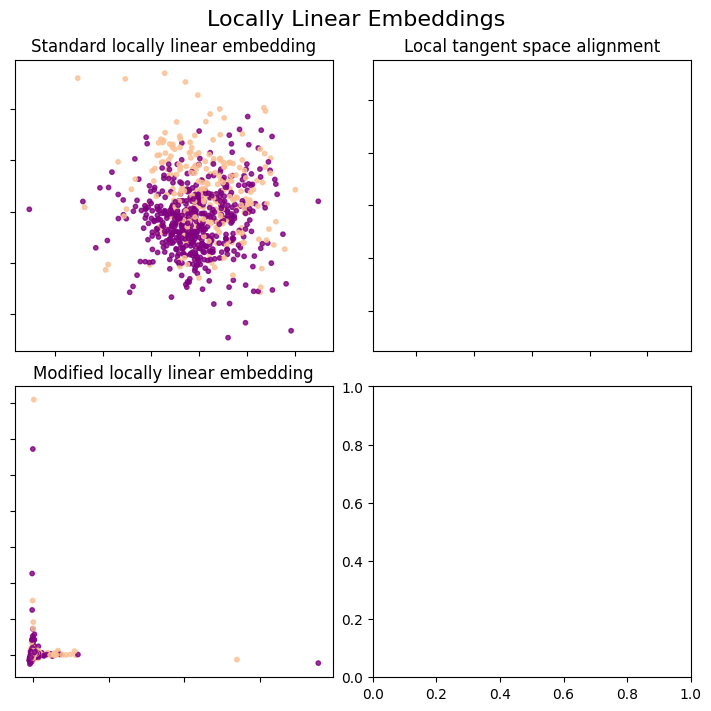

In [157]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    # ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, list(color['color']), name)

plt.show()

## Isomap

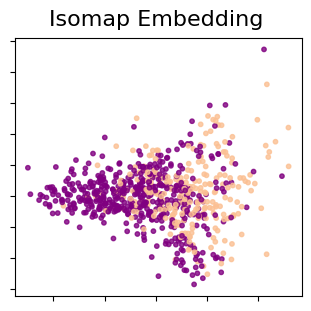

In [158]:
isomap = manifold.Isomap()
S_isomap = isomap.fit_transform(features)

plot_2d(S_isomap, list(color['color']), "Isomap Embedding")

## MSD

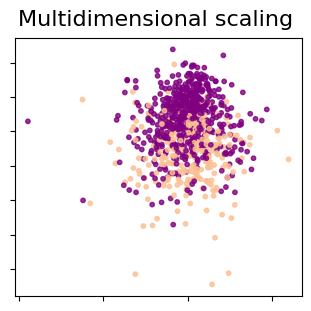

In [159]:
md_scaling = manifold.MDS(
    n_components=n_components, max_iter=50, n_init=4
)
S_scaling = md_scaling.fit_transform(features)

plot_2d(S_scaling, list(color['color']), "Multidimensional scaling")

## Spectral Embedding for nonlinear

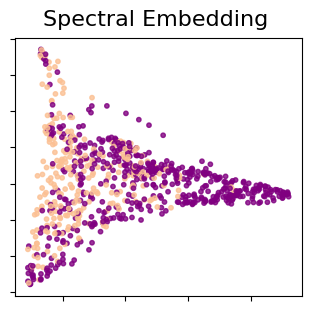

In [160]:
spectral = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
S_spectral = spectral.fit_transform(features)

plot_2d(S_spectral, list(color['color']), "Spectral Embedding")

## tSNE

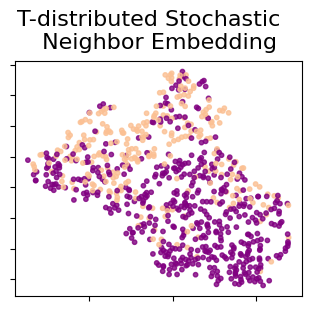

In [164]:
t_sne = manifold.TSNE(
    n_components=n_components,
    learning_rate="auto",
    # perplexity=30,
    # n_iter=250,
    init="random",
)
S_t_sne = t_sne.fit_transform(features)

plot_2d(S_t_sne, list(color['color']), "T-distributed Stochastic  \n Neighbor Embedding")

No clue any conclusion at this point...

## Ler's try 3D

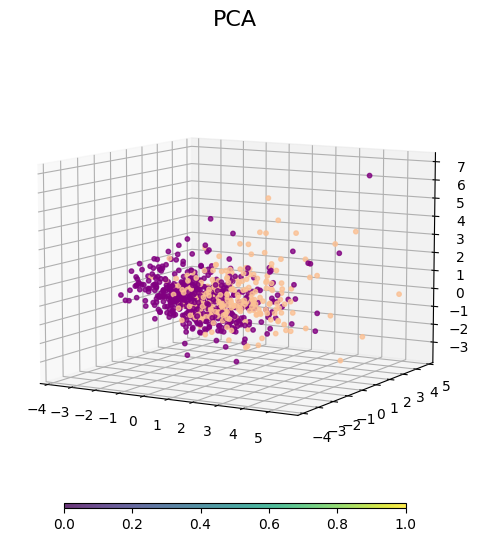

In [167]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features)
plot_3d(principalComponents, list(color['color']), "PCA")

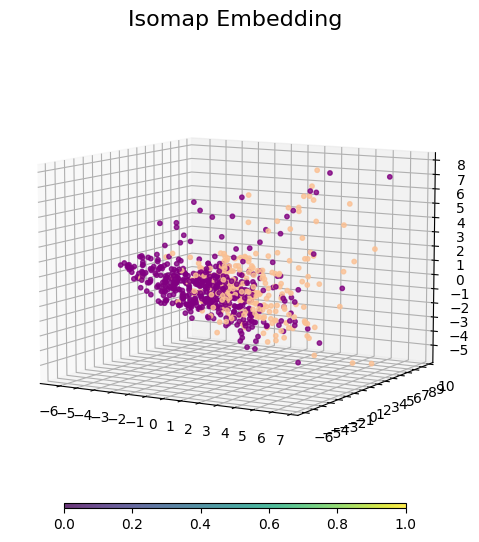

In [171]:
isomap = manifold.Isomap(n_components=3)
S_isomap = isomap.fit_transform(features)

plot_3d(S_isomap, list(color['color']), "Isomap Embedding")

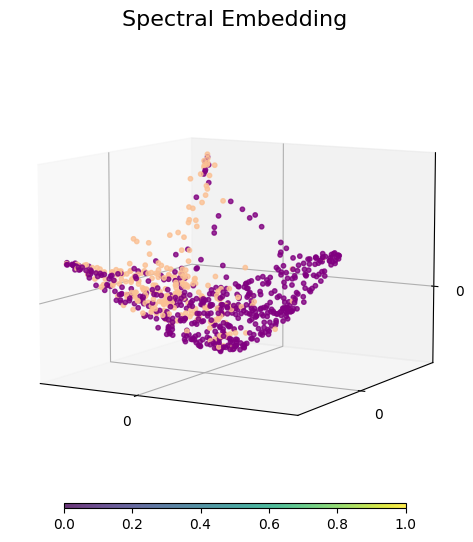

In [169]:
spectral = manifold.SpectralEmbedding(
    n_components=3, n_neighbors=n_neighbors
)
S_spectral = spectral.fit_transform(features)

plot_3d(S_spectral, list(color['color']), "Spectral Embedding")

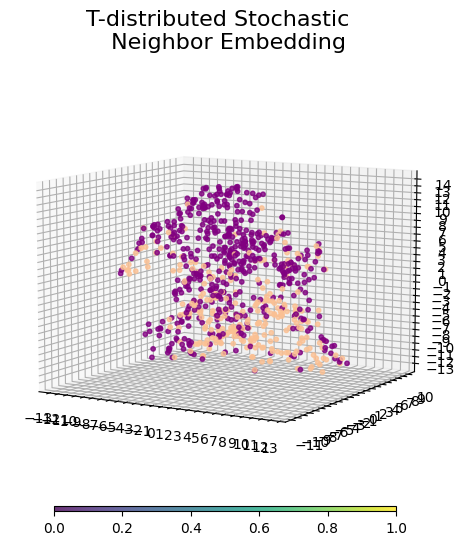

In [168]:
t_sne = manifold.TSNE(
    n_components=3,
    learning_rate="auto",
    # perplexity=30,
    # n_iter=250,
    init="random",
)
S_t_sne = t_sne.fit_transform(features)

plot_3d(S_t_sne, list(color['color']), "T-distributed Stochastic  \n Neighbor Embedding")